# 项目：数据科学家2023年薪资数据

## 简介

数据集包含数据科学领域不同岗位的薪资水平。

变量含义：
- `work_year`：支付薪资的年份
- `experience_level`：工作年份期间的经验水平
- `employment_type`：职位的就业类型
- `job_title`：工作年份期间从事的职位
- `salary`：支付的总薪资金额
- `salary_currency`：支付的薪资货币，使用 ISO 4217 货币代码表示
- `salaryinusd`：以美元计算的薪资金额
- `employee_residence`：员工在工作年份期间的主要居住国家，使用 ISO 3166 国家代码表示
- `remote_ratio`：远程工作的整体比例
- `company_location`：雇主总部所在国家或分支机构所在国家
- `company_size`：公司在工作年份期间的员工人数的中位数

## 1 读取数据

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
original_data = pd.read_csv("./ds_salaries.csv")
original_data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


## 2 评估和清理数据

In [3]:
cleaned_data = original_data.copy()

### 数据整齐度（结构）

In [4]:
cleaned_data.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L
7,2023,SE,FT,Data Scientist,219000,USD,219000,CA,0,CA,M
8,2023,SE,FT,Data Scientist,141000,USD,141000,CA,0,CA,M
9,2023,SE,FT,Data Scientist,147100,USD,147100,US,0,US,M


从头部的10行数据来看，数据符合“每个变量为一列，每个观察值为一行，每种类型的观察单位为一个表格”，因此不存在结构性问题。

### 数据干净度（内容）

In [5]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


从输出结果来看，`cleaned_data`数据共有3755条观察值，变量均不存在缺失值。

数据类型方面
- `work_year`：通常为整数类型，通常不需要更改。
- `experience_level`、`employment_type`、`job_title`、`employee_residence`、`company_location`、`company_size`：这些列都是分类数据，如果要进行分类分析或可视化，保持字符串（object）类型或将其转换为类别类型（category）会更高效。
- `salary` 和 `salary_in_usd`：这些是数值数据，应该保持为整数或浮点数类型。
- `remote_ratio`：这个列表示远程工作的比例，通常是整数类型。

In [6]:
# 将某些列转换为类别类型
cleaned_data['experience_level'] = cleaned_data['experience_level'].astype('category')
cleaned_data['employment_type'] = cleaned_data['employment_type'].astype('category')
cleaned_data['job_title'] = cleaned_data['job_title'].astype('category')
cleaned_data['employee_residence'] = cleaned_data['employee_residence'].astype('category')
cleaned_data['company_location'] = cleaned_data['company_location'].astype('category')
cleaned_data['company_size'] = cleaned_data['company_size'].astype('category')

In [7]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   work_year           3755 non-null   int64   
 1   experience_level    3755 non-null   category
 2   employment_type     3755 non-null   category
 3   job_title           3755 non-null   category
 4   salary              3755 non-null   int64   
 5   salary_currency     3755 non-null   object  
 6   salary_in_usd       3755 non-null   int64   
 7   employee_residence  3755 non-null   category
 8   remote_ratio        3755 non-null   int64   
 9   company_location    3755 non-null   category
 10  company_size        3755 non-null   category
dtypes: category(6), int64(4), object(1)
memory usage: 177.4+ KB


处理缺失数据 —— **没有缺失数据**

In [8]:
cleaned_data.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

处理重复数据 —— 根据数据变量的含义以及内容来看，**允许变量重复**，我们不需要对此数据检查是否存在重复值。

处理不一致数据 —— 不一致数据可能存在于所有分类变量中，我们要查看是否存在不同值实际指代同一目标的情况。**这里不存在**

In [9]:
# cleaned_data['experience_level'].value_counts()
# cleaned_data['employment_type'].value_counts()
# cleaned_data['job_title'].value_counts()
# cleaned_data['employee_residence'].value_counts()
# cleaned_data['company_location'].value_counts()
# cleaned_data['company_size'].value_counts()

处理无效或者错误数据——从以下统计信息来看，`cleaned_data`里**不存在脱离现实意义的数值**。

In [10]:
cleaned_data.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


## 3 数据可视化

In [11]:
# 设置图表风格为白色网格
sns.set(style="whitegrid")

In [12]:
# 设置图表色盘为"Set2"
sns.set_palette("Set2")

绘制不同经验水平的薪资分布

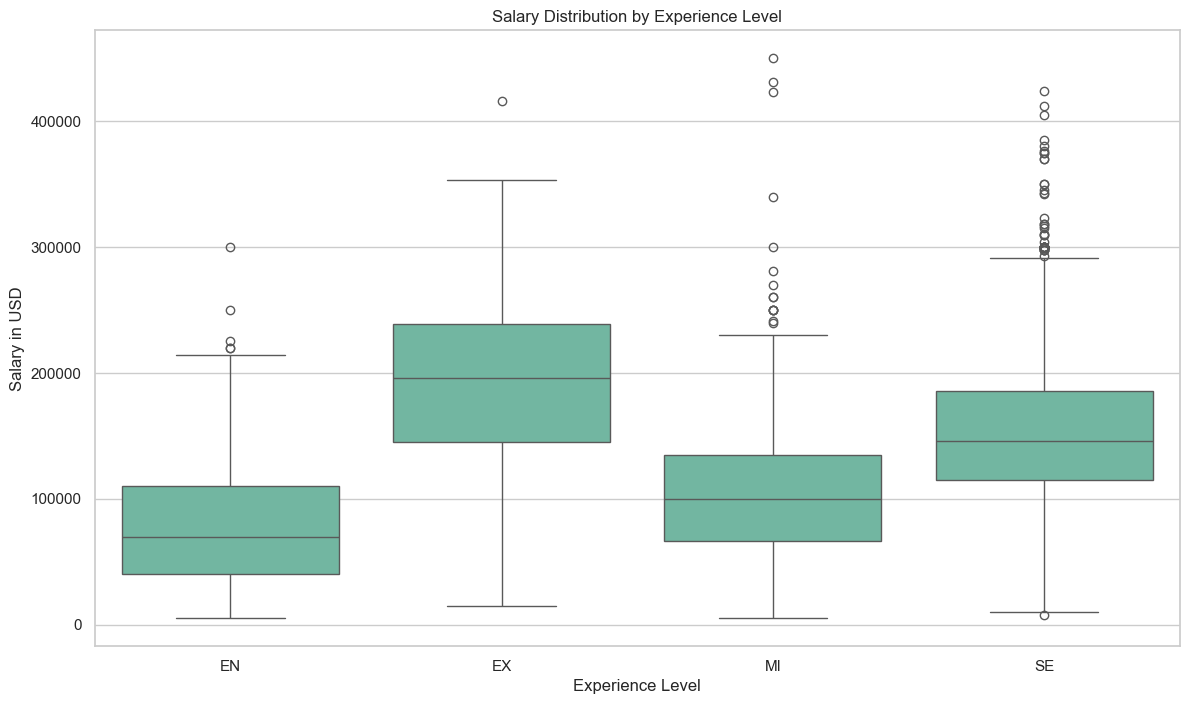

In [13]:
# 根据经验水平分析薪资分布情况
plt.figure(figsize=(14, 8))
sns.boxplot(x='experience_level', y='salary_in_usd', data=cleaned_data)
plt.title('Salary Distribution by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary in USD')
plt.show()

绘制不同就业类型的薪资分布

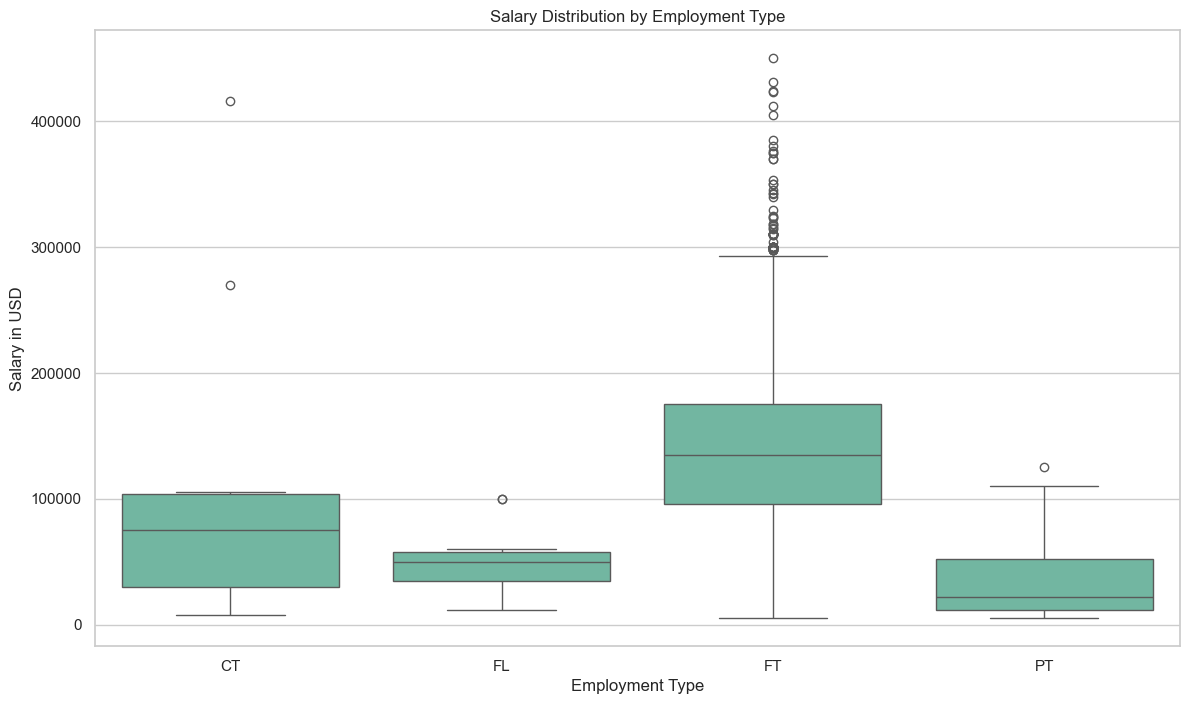

In [14]:
# 根据就业类型分析薪资分布情况
plt.figure(figsize=(14, 8))
sns.boxplot(x='employment_type', y='salary_in_usd', data=cleaned_data)
plt.title('Salary Distribution by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Salary in USD')
plt.show()

 绘制不同职位的薪资分布

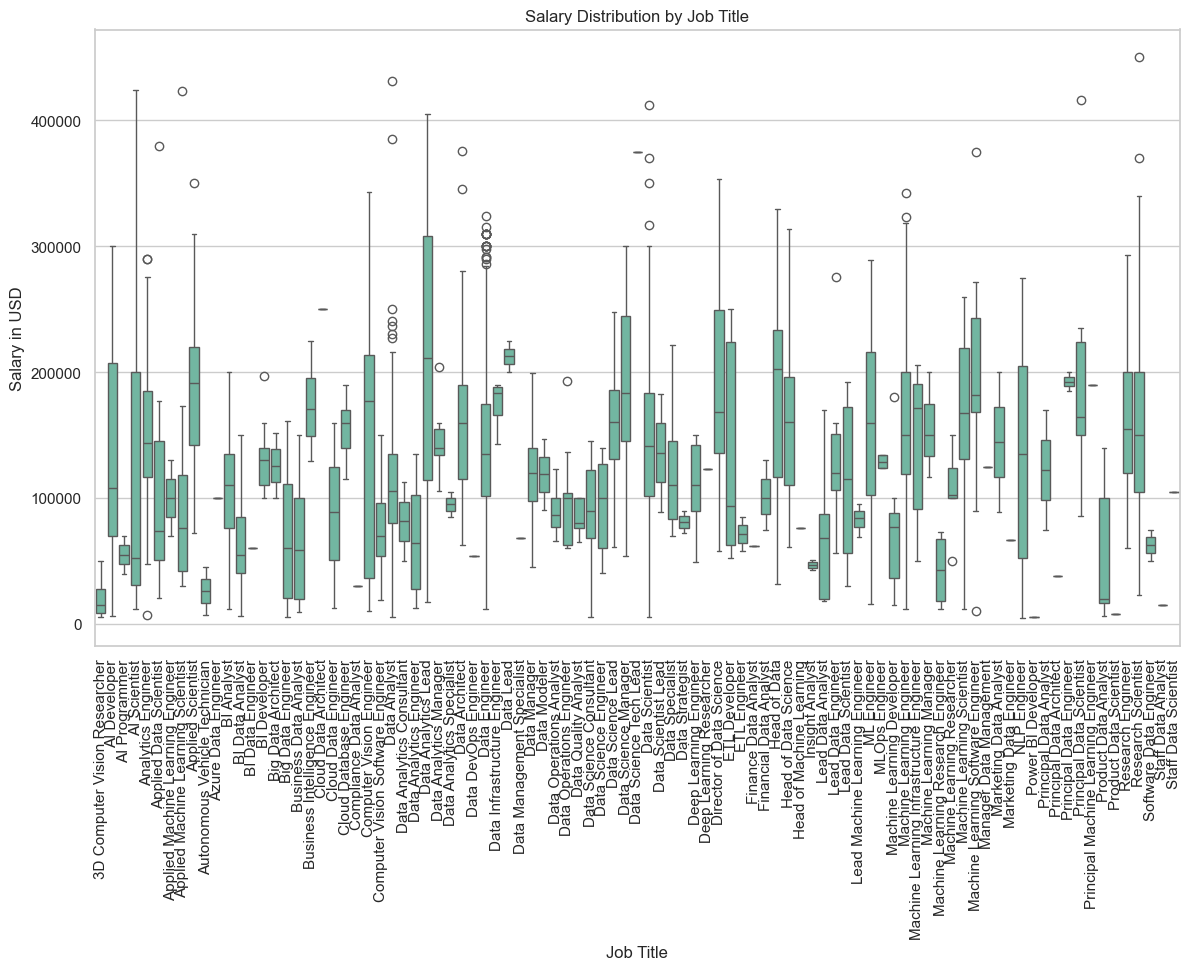

In [15]:
# 根据职位分析薪资分布情况
plt.figure(figsize=(14, 8))
sns.boxplot(x='job_title', y='salary_in_usd', data=cleaned_data)
plt.xticks(rotation=90)  # 旋转x轴标签
plt.title('Salary Distribution by Job Title')
plt.xlabel('Job Title')
plt.ylabel('Salary in USD')
plt.show()

查看不同国家的薪资分布

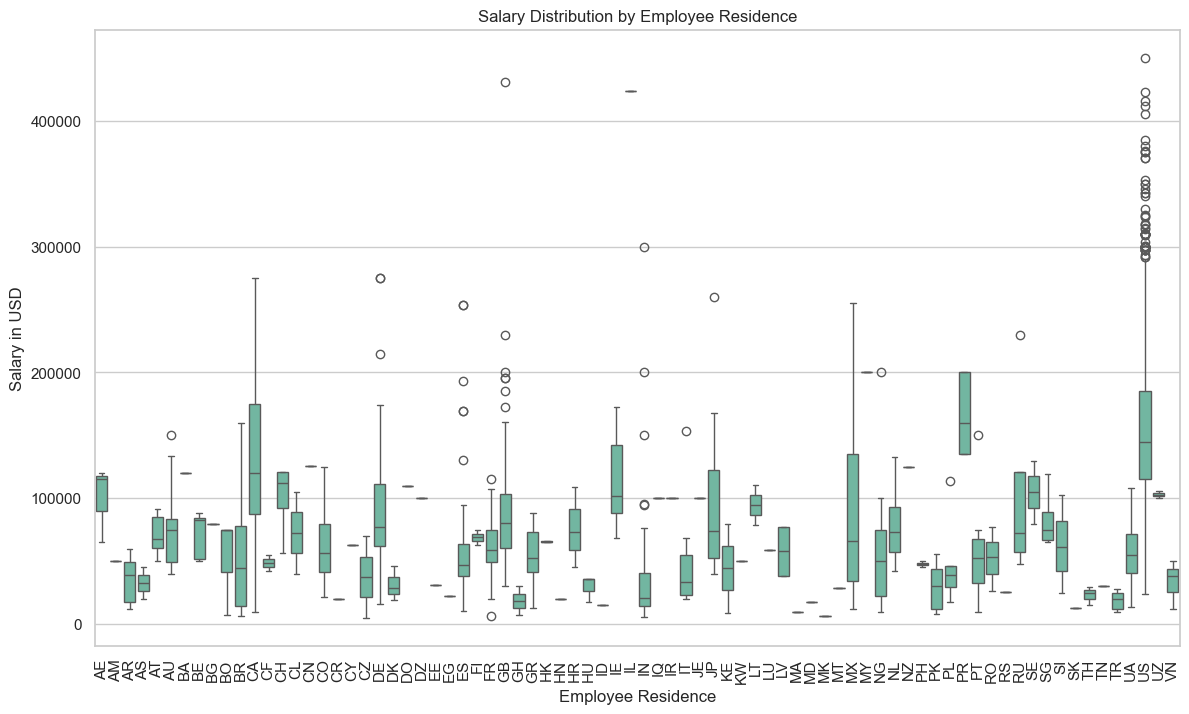

In [16]:
# 根据员工居住地分析薪资分布情况
plt.figure(figsize=(14, 8))
sns.boxplot(x='employee_residence', y='salary_in_usd', data=cleaned_data)
plt.xticks(rotation=90)  # 旋转x轴标签
plt.title('Salary Distribution by Employee Residence')
plt.xlabel('Employee Residence')
plt.ylabel('Salary in USD')
plt.show()

查看不同公司规模的薪资分布

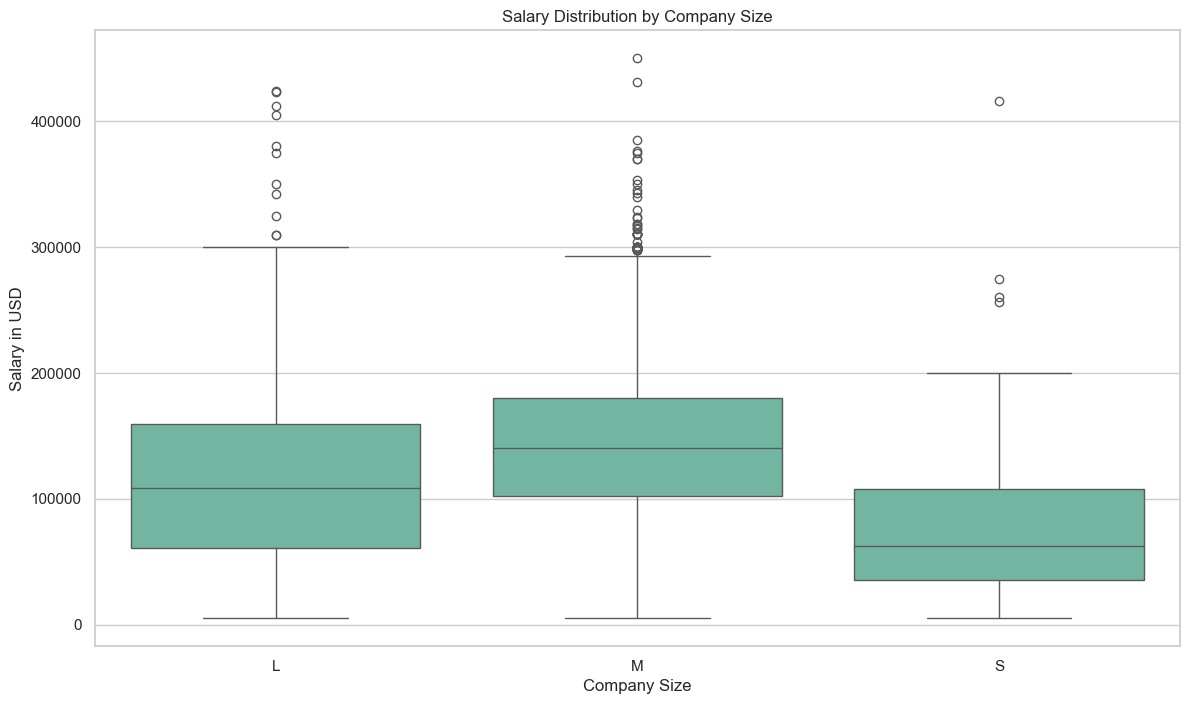

In [17]:
# 根据公司规模分析薪资分布情况
plt.figure(figsize=(14, 8))
sns.boxplot(x='company_size', y='salary_in_usd', data=cleaned_data)
plt.title('Salary Distribution by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Salary in USD')
plt.show()

分析远程工作比例对薪资的影响

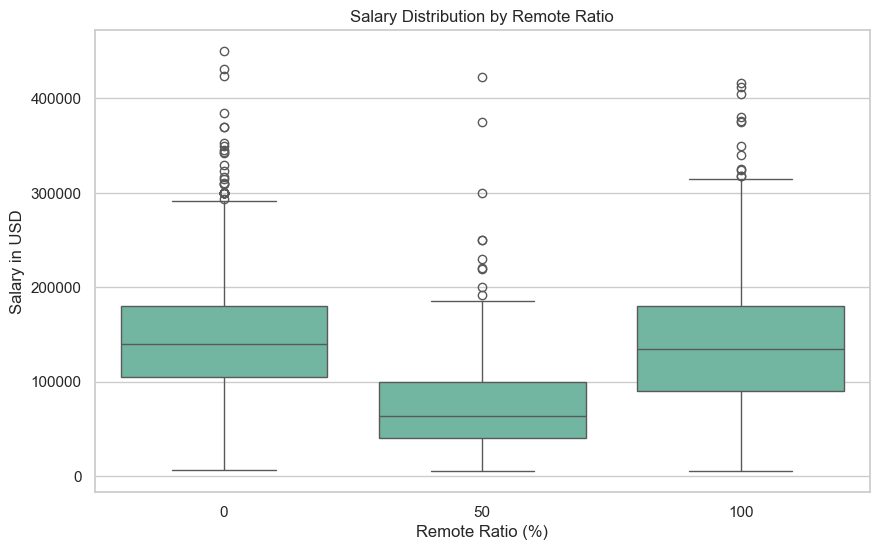

In [18]:
# 绘制远程工作比例与薪资的关系
plt.figure(figsize=(10, 6))
sns.boxplot(x='remote_ratio', y='salary_in_usd', data=cleaned_data)
plt.title('Salary Distribution by Remote Ratio')
plt.xlabel('Remote Ratio (%)')
plt.ylabel('Salary in USD')
plt.show()